In [2]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pandas as pd
from textblob import TextBlob

df = pd.read_csv('/home/prateek/Prateek/Courses/Cloud/Project/data.csv')

#Select only first 10k rows.
df = df.head(16000)
#Add sentiment analysis columns
def reviewFeatures(row):
  review = row['reviewContent']
  analysis = TextBlob(review)
  return pd.Series([len(review), analysis.sentiment.polarity, analysis.sentiment.subjectivity]
           , index = ['reviewLength', 'sentimentPolarity', 'sentimentSubjectivity'])

df[['reviewLength', 'sentimentPolarity', 'sentimentSubjectivity']]  = df.apply(reviewFeatures, axis=1)


#Convert NR->N , YR->Y

df.loc[df['flagged'] == "N", 'Target'] = "0"
df.loc[df['flagged'] == "Y", 'Target'] = "1"

In [4]:
import re

clean_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
clean_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
# function to clean text data
def clean_desc(desc):
    desc = [clean_1.sub("", line.lower()) for line in desc]
    desc = [clean_2.sub(" ", line) for line in desc]
    return desc
df['reviewContent'] = clean_desc(df['reviewContent'])
df = df.drop(['name', 'location', 'fanCount', 'restaurantRating','mnr','rl','rd','Maximum Content Similarity','yelpJoinDate', 'friendCount','reviewUsefulCount','tipCount','complimentCount','firstCount','reviewCount'], axis=1)
df.head()

,reviewID,reviewerID,restaurantID,date,rating,reviewContent,flagged,usefulCount,coolCount,funnyCount,reviewLength,sentimentPolarity,sentimentSubjectivity,Target
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,unlike next we d eaten previous night dish com...,N,41,5,5,3226.0,0.140779,0.525565,0
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,probably one best meals i ve ever it s perform...,N,0,0,0,251.0,0.471429,0.557143,0
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,service impeccable experience presentation coo...,N,6,0,1,186.0,0.413333,0.720000,0
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,the problem places like this given exhorbitant...,N,35,8,6,1593.0,0.120548,0.535201,0
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,i idea write review dining alinea brings whole...,N,1650,679,417,638.0,0.167460,0.564683,0


In [5]:
#Ref: https://medium.com/@makcedward/nlp-pipeline-stop-words-part-5-d6770df8a936
# Part 1 through 6
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner", "textcat"])

# tokenization using spaCy
def tokenization(x):
    desc_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        desc_tokens.append(temp)
    
    return desc_tokens
  
# function to remove stopwords
def remove_stopwords(desc):
    s = []
    for r in tqdm(desc):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

In [6]:
#Tokenization for Train data
#Bypass for experiments

df['tokenized'] = tokenization(df['reviewContent'])
df['tokenized'] = remove_stopwords(df['tokenized'])

  0%|          | 0/4279 [00:00<?, ?it/s]/home/prateek/.local/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 4279/4279 [00:00<00:00, 23251.67it/s]


In [7]:
df.head()
#S

,reviewID,reviewerID,restaurantID,date,rating,reviewContent,flagged,usefulCount,coolCount,funnyCount,reviewLength,sentimentPolarity,sentimentSubjectivity,Target,tokenized
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,unlike next we d eaten previous night dish com...,N,41,5,5,3226.0,0.140779,0.525565,0,unlike d eaten previous night dish completely ...
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,probably one best meals i ve ever it s perform...,N,0,0,0,251.0,0.471429,0.557143,0,probably best meals ve s performance food havi...
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,service impeccable experience presentation coo...,N,6,0,1,186.0,0.413333,0.720000,0,service impeccable experience presentation coo...
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,the problem places like this given exhorbitant...,N,35,8,6,1593.0,0.120548,0.535201,0,problem places like given exhorbitant cost med...
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,i idea write review dining alinea brings whole...,N,1650,679,417,638.0,0.167460,0.564683,0,idea write review dining alinea brings differe...


In [8]:
df['reviewContent']

0       unlike next we d eaten previous night dish com...
1       probably one best meals i ve ever it s perform...
2       service impeccable experience presentation coo...
3       the problem places like this given exhorbitant...
4       i idea write review dining alinea brings whole...
                              ...                        
4274    this review long overdue i ve patronizing maya...
4275    great food good atmosphere the reason 4 5 marg...
4276    say felt like mayan god wonderful food steak c...
4277    were all out of stars here with this one with ...
4278    we tried date night pretty decent however wait...
Name: reviewContent, Length: 4279, dtype: object

In [9]:
print(df['Target'].value_counts())
print(len(df))

0    3563
1     716
Name: Target, dtype: int64
4279


In [10]:
from sklearn.model_selection import train_test_split

y = df['Target']
X = df.drop(['Target'], axis=1)

# Split the train data into X_train and y_train datasets in 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_combine, y_train, y_combine = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

print("Train data shape : " + str(X_train.shape))
#print("Combine data shape : " + str(X_combine.shape))
print("Test data shape : " + str(X_test.shape))
print(y_train.value_counts())
#print(y_combine.value_counts())
print(y_test.value_counts())

Train data shape : (2738, 14)
Test data shape : (856, 14)
0    2271
1     467
Name: Target, dtype: int64
0    731
1    125
Name: Target, dtype: int64


In [11]:
from nltk import FreqDist

def get_frequent_words(x, terms=100):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  return d

plotData = get_frequent_words(df['tokenized'])

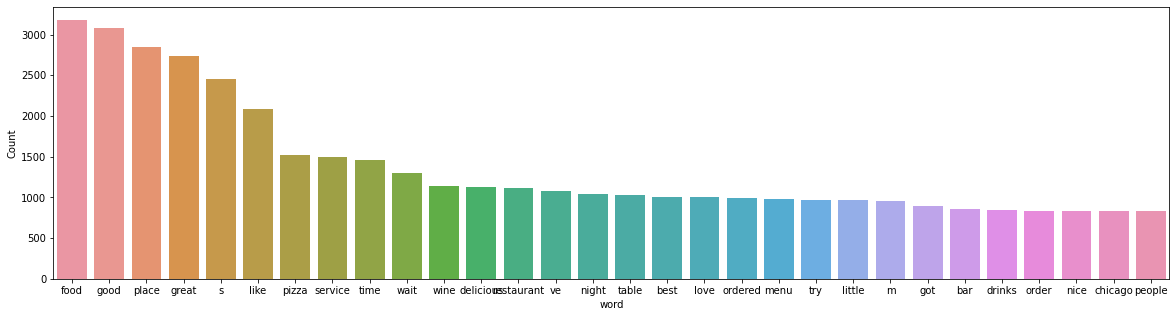

In [12]:
# function to plot top n most frequent words
def freq_words(d):
  d = d.nlargest(columns="count", n=30)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

#plotData = plotData.drop([45, 91, 337])
freq_words(plotData)

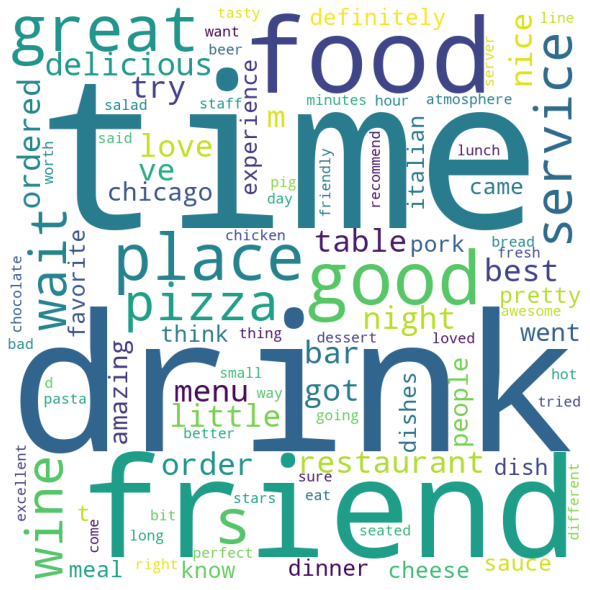

In [13]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(plotData['word'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [14]:
#Ref: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
#Don't fit test data. Only transform it.

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_idf = vectorizer.fit_transform(X_train['tokenized'])
X_test_idf = vectorizer.transform(X_test['tokenized'])

print(X_train_idf.shape)
#print(X_combine_idf.shape)
print(X_test_idf.shape)
print(y_train.shape)
#print(y_combine.shape)
print(y_test.shape)

(2738, 13468)
(856, 13468)
(2738,)
(856,)


In [15]:
X_test_idf

<856x13468 sparse matrix of type '<class 'numpy.float64'>'
	with 41522 stored elements in Compressed Sparse Row format>

In [16]:
#Train using XGBoost on csr matrix
from xgboost import XGBClassifier

# fit model no training data
modelXGB = XGBClassifier(verbosity=3, random_state=42)
modelXGB.fit(X_train_idf, y_train)

# make predictions for test data
y_pred = modelXGB.predict(X_test_idf)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

[02:03:12] DEBUG: ../src/gbm/gbtree.cc:155: Using tree method: 2
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6


/home/prateek/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[02:03:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned no

In [17]:
#Train on other features
from xgboost import XGBClassifier

X_train_features = X_train.drop(['date','flagged', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID', 'tokenized'], axis=1)
X_test_features = X_test.drop(['date','flagged', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID', 'tokenized'], axis=1)


# fit model no training data
modelXGB = XGBClassifier()
modelXGB.fit(X_train_features, y_train)

# make predictions for test data
y_pred = modelXGB.predict(X_test_features)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

[02:03:14] ======== Monitor (0): Learner ========
[02:03:14] Configure: 0.000323s, 1 calls @ 323us

[02:03:14] ======== Monitor (0): GBTree ========
[02:03:14] ======== Monitor (0): TreePruner ========
[02:03:14] DEBUG: ../src/gbm/gbtree.cc:155: Using tree method: 2
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/

/home/prateek/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[02:03:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned no

In [18]:
X_train_features.head()


,rating,usefulCount,coolCount,funnyCount,reviewLength,sentimentPolarity,sentimentSubjectivity
334,4,17,11,21,617.0,0.251136,0.543939
1686,3,107,38,38,1313.0,0.306399,0.518750
3951,4,43,11,9,277.0,0.021429,0.433333
2717,1,153,43,13,510.0,0.122879,0.467273
3870,2,31,4,6,429.0,0.125000,0.351515


<AxesSubplot:>

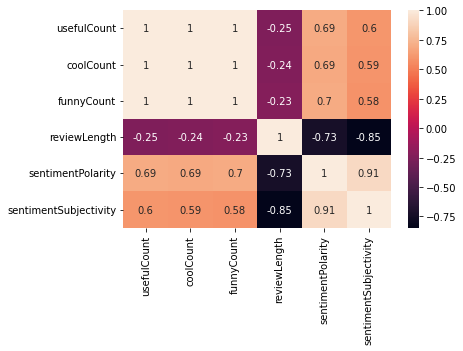

In [20]:
import seaborn as sns

flagged = df.loc[df['Target'] == "0"].groupby('rating').mean()
#flagged = df.loc[df['Target'] == 0]
sns.heatmap(data=flagged.corr(), annot=True)

<AxesSubplot:>

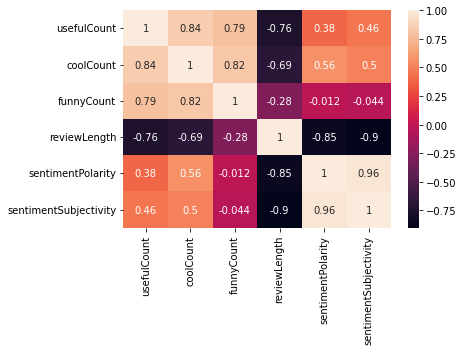

In [21]:
flagged = df.loc[df['Target'] == "1"].groupby('rating').mean()
#flagged = df.loc[df['Target'] == 1]
sns.heatmap(data=flagged.corr(), annot=True)